РЕШИТЬ ЗАДАЧУ ПРОГНОЗИРОВАНИЯ ЦЕН НА ПОДДЕРЖАННЫЕ АВТОМОБИЛИ

In [3]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt # загружаем библиотеку и для простоты обращения в коде называем её сокращенно plt
%matplotlib inline 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/ford.csv', index_col=0)
print("data shape:")
print(df.shape)
print("columns name:")
print(list(df.columns))
#Целевая: Цена

data shape:
(17965, 8)
columns name:
['year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']


In [6]:
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
model,,,,,,,,
Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [7]:
training_values = df['price']
rem = ['price','fuelType', 'transmission']
training_points = df.drop(rem, axis=1)
print("data shape:")
training_values.shape

data shape:


(17965,)

In [8]:
training_points.shape
#таблица содержит 17965 строк (объектов) и 5 столбцов (признаков), включая выходной (целевой) признак

(17965, 5)

In [9]:
#Обрабатываем данные
training_points.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17965 entries,  Fiesta to  KA
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        17965 non-null  int64  
 1   mileage     17965 non-null  int64  
 2   tax         17965 non-null  int64  
 3   mpg         17965 non-null  float64
 4   engineSize  17965 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 842.1+ KB


In [10]:
from sklearn import linear_model, ensemble
linear_regression_model = linear_model.LinearRegression() # создаем модель регрессия

In [11]:
random_forest_model = ensemble.RandomForestRegressor() # создаем модель сл лес

In [12]:
# ОБУЧАЕМ МОДЕЛЬ
linear_regression_model.fit(training_points, training_values)

LinearRegression()

In [13]:
random_forest_model.fit(training_points, training_values)

RandomForestRegressor()

In [16]:
dftest = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/ford.csv', index_col=0)
print("data shape:")
print(dftest.shape)
print("columns name:")
print(list(dftest.columns))

data shape:
(17965, 8)
columns name:
['year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']


In [17]:
rem1 = ['fuelType', 'transmission']
test_data = dftest.drop(rem1, axis=1)
test_data.shape

(17965, 6)

In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17965 entries,  Fiesta to  KA
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        17965 non-null  int64  
 1   price       17965 non-null  int64  
 2   mileage     17965 non-null  int64  
 3   tax         17965 non-null  int64  
 4   mpg         17965 non-null  float64
 5   engineSize  17965 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 982.5+ KB


In [19]:
test_values = test_data['price']
test_points = test_data.drop('price', axis=1)

In [20]:
# ТЕСТИРОВАНИЕ МОДЕЛЕЙ И ИХ СРАВНЕНИЕ
#Получим прогнозы целевой переменной на тестовых данных 
test_predictions_linear = linear_regression_model.predict(test_points)

In [21]:
test_predictions_random_forest = random_forest_model.predict(test_points)

In [22]:
%matplotlib inline 

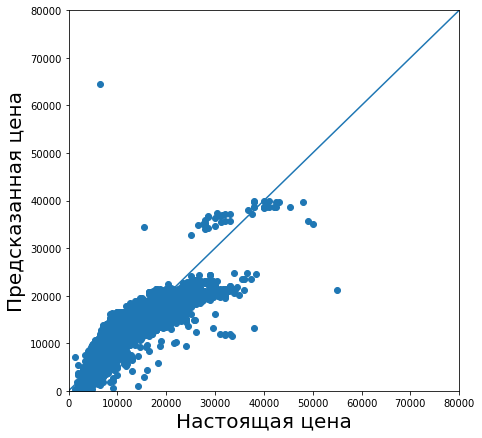

In [23]:
plt.figure(figsize=(7, 7))
plt.axis([0, 80000,0, 80000])
plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 6 * 10**6], [0, 6 * 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

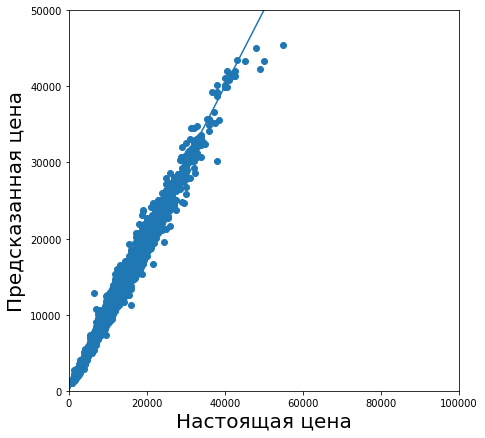

In [24]:
plt.figure(figsize=(7, 7))
plt.axis([0, 100000,0, 50000])
plt.scatter(test_values, test_predictions_random_forest)
plt.plot([0, 6 * 10**6], [0, 6 * 10**6])
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
# Подсчитаем ошибки для линейной модели
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear) 
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)

In [27]:
# Подсчитаем ошибки для модели случайного леса
mean_absolute_error_random_forest_model = mean_absolute_error(test_values, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(test_values, test_predictions_random_forest)

In [28]:
import numpy as np

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели линейной регрессии".format(
        mean_absolute_error_linear_model, 
        np.sqrt(mean_squared_error_linear_model)))

print("MAE: {0:7.2f}, RMSE: {1:7.2f} для модели случайного леса".format(
       mean_absolute_error_random_forest_model, 
       mean_squared_error_random_forest_model**(1/2)))
# модель случайного леса работает лучше

MAE: 1770.29, RMSE: 2478.49 для модели линейной регрессии
MAE:  368.67, RMSE:  550.58 для модели случайного леса


In [29]:
# ВАЖНОСТЬ ПАРАМЕТРОВ
#Получить оценку важности признаков
random_forest_model.feature_importances_

array([0.48864563, 0.09403561, 0.01296178, 0.11136059, 0.29299639])

In [30]:
feature_importance = pd.DataFrame(columns = ['Название признака', 'Важность признака'])

In [31]:
feature_importance['Название признака'] = training_points.keys()
feature_importance['Важность признака'] = random_forest_model.feature_importances_

In [32]:
# выведем полученную таблицу
feature_importance

,Название признака,Важность признака
0,year,0.488646
1,mileage,0.094036
2,tax,0.012962
3,mpg,0.111361
4,engineSize,0.292996
